In [31]:
# matlotlib inline plotting
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
from __future__ import print_function
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from six.moves import cPickle as pickle

from collections import Counter

from utils import maybe_download as maybe_download
from utils import maybe_extract as maybe_extract
from utils import load_data as load_data
from utils import maybe_pickle as maybe_pickle

# Fetch and Extract Data

In [33]:
url = 'http://ufldl.stanford.edu/housenumbers/'

trainFilename = 'train.tar.gz'
testFilename = 'test.tar.gz'
extraFilename = 'extra.tar.gz'

In [34]:
maybe_download(url, trainFilename, 404141560)
maybe_download(url, testFilename, 276555967)
maybe_download(url, extraFilename, 1955489752)

maybe_download(url, 'train_32x32.mat', 182040794)
maybe_download(url, 'test_32x32.mat', 64275384)
maybe_download(url, 'extra_32x32.mat', 1329278602)

Found and verified train.tar.gz
Found and verified test.tar.gz
Found and verified extra.tar.gz
Attempting to download: train_32x32.mat
0%....5%....10%....15%....20%....25%....30%....35%....40%....45%....50%....55%....60%....65%....70%....75%....80%....85%....90%....95%....100%
Download Complete!
Found and verified train_32x32.mat
Attempting to download: test_32x32.mat
0%....5%....10%....15%....20%....25%....30%....35%....40%....45%....50%....55%....60%....65%....70%....75%....80%....85%....90%....95%....100%
Download Complete!
Found and verified test_32x32.mat
Attempting to download: extra_32x32.mat
0%....5%....10%....15%....20%....25%....30%....35%....40%....45%....50%....55%....60%....65%....70%....75%....80%....85%....90%....95%....100%
Download Complete!
Found and verified extra_32x32.mat


'extra_32x32.mat'

In [35]:
trainStruct = maybe_extract(trainFilename)
testStruct = maybe_extract(testFilename)
extraStruct = maybe_extract(extraFilename)

train already present - Skipping extraction of train.tar.gz.
Extracting data for test. This may take a while. Please wait.
Extracting data for extra. This may take a while. Please wait.


# Explore/Visualize Data

In [37]:
trainTuple = load_data('train/digitStruct.mat')
testTuple = load_data('test/digitStruct.mat')
extraTuple = load_data('extra/digitStruct.mat')

0 elapsed
5000 elapsed
10000 elapsed
15000 elapsed
20000 elapsed
25000 elapsed
30000 elapsed
0 elapsed
5000 elapsed
10000 elapsed
0 elapsed
5000 elapsed
10000 elapsed
15000 elapsed
20000 elapsed
25000 elapsed
30000 elapsed
35000 elapsed
40000 elapsed
45000 elapsed
50000 elapsed
55000 elapsed
60000 elapsed
65000 elapsed
70000 elapsed
75000 elapsed
80000 elapsed
85000 elapsed
90000 elapsed
95000 elapsed
100000 elapsed
105000 elapsed
110000 elapsed
115000 elapsed
120000 elapsed
125000 elapsed
130000 elapsed
135000 elapsed
140000 elapsed
145000 elapsed
150000 elapsed
155000 elapsed
160000 elapsed
165000 elapsed
170000 elapsed
175000 elapsed
180000 elapsed
185000 elapsed
190000 elapsed
195000 elapsed
200000 elapsed


In [38]:
extraTuple[0][[1,2,3,4]].shape

(4, 6)

In [39]:
trainTuple[0][[1,2,3,4]].shape

(4, 6)

In [40]:
testTuple[0][[1,2,3,4]].shape

(4, 6)

#### saving dataset 

In [45]:
maybe_pickle('dataset', trainTuple, testTuple, extraTuple)

dataset already present - Skipping pickling.


'dataset.pickle'

#### load dataset

In [71]:
try:
    with open('dataset.pickle', 'rb') as f:
            dataset = pickle.load(f)
        
except Exception as e:
    print('Unable to process data (dataset.pickle)', ':', e)
    raise

#### data exploration

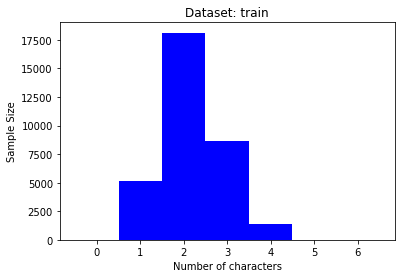

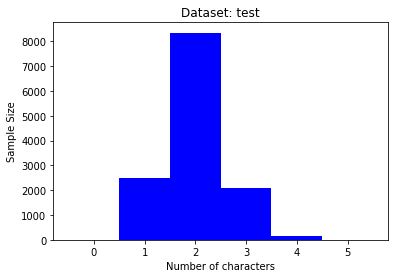

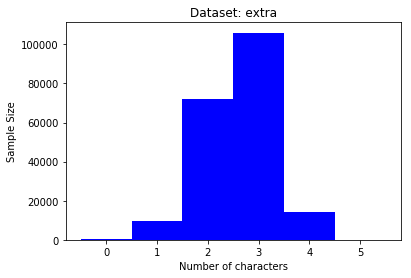

In [68]:
for data in ('train', 'test', 'extra'):
    c = Counter(np.sum(dataset[data]["tops"] > 0, axis =1))
    l = plt.bar(list(c.keys()), list(c.values()), 1, color="blue")

    plt.xlabel('Number of characters')
    plt.ylabel('Sample Size')
    plt.title('Dataset: ' + data)

    plt.show()